<a href="https://colab.research.google.com/github/AhmedEssamK/MLProjects/blob/main/CV_Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

# Function to transform an image into a 2D array and calculate the co-occurrence matrix (North-South orientation)
def TransformImageAndCalculateCoOccurrence(image_path, distance=1, levels=256):
    # Load the image in grayscale
    image = cv2.imread(image_path, 0)

    if image is None:
        raise Exception("Failed to load the image.")

    # Calculate the size of the input image
    rows, cols = image.shape

    # Initialize the co-occurrence matrix
    co_occurrence_matrix = np.zeros((levels, levels), dtype=np.uint32)

    for i in range(rows):
        for j in range(cols - distance):
            # Get the pixel values at the current and neighbor positions
            current_pixel = image[i, j]
            neighbor_pixel = image[i, j + distance]

            # Increment the corresponding entry in the co-occurrence matrix
            co_occurrence_matrix[current_pixel, neighbor_pixel] += 1

    # Normalize the co-occurrence matrix to make it a probability matrix
    co_occurrence_matrix = co_occurrence_matrix.astype(float)
    co_occurrence_matrix /= np.sum(co_occurrence_matrix)

    return co_occurrence_matrix

# Example usage:
image_path = '/content/CVtest1.png'  # Replace with the path to your image
co_occurrence_matrix = TransformImageAndCalculateCoOccurrence(image_path, distance=1, levels=256)

# The co-occurrence matrix is now available for further analysis.


In [ ]:
co_occurrence_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.44843594e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.44843594e-07, 4.89687188e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.69327953e-05, 0.00000000e+00, 2.47292030e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.96260749e-05, 0.00000000e+00, 5.20047793e-04]])

In [ ]:
def CalculateContrast(co_occurrence_matrix):
    levels = co_occurrence_matrix.shape[0]
    contrast = 0.0

    for i in range(levels):
        for j in range(levels):
            contrast += co_occurrence_matrix[i, j] * abs(i - j)

    denominator = np.sum(np.abs(np.arange(levels) - np.arange(levels)[:, None]))

    if denominator != 0:
        contrast /= denominator

    return contrast

# Example usage:
# Assuming you already have a co-occurrence matrix named co_occurrence_matrix
contrast_value = CalculateContrast(co_occurrence_matrix)
print(f"Contrast: {contrast_value}")


Contrast: 3.6578511758099183e-07


In [ ]:
import cv2
import numpy as np

def CalculateHistogramFromImage(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, 0)

    if image is None:
        raise Exception("Failed to load the image.")

    # Calculate the histogram using NumPy
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))

    return histogram

# Example usage:
image_path = '/content/CVtest1.png'  # Replace with the path to your image
histogram = CalculateHistogramFromImage(image_path)
print(histogram)


[   19    13    11    28    44    79   171     0   253   440   675  1151
  1927  3093     0  4572  6816  9362 12368 16437 20524     0 25046 29286
 33403 37391 40691 43937     0 46650 48795 50205 51078 52184 51500     0
 52307 51768 51731 51215 51748 51797     0 50913 50056 49196 47980 47666
 46680     0 45771 45749 45061 44121 43454 42043     0 40884 38631 37224
 35623 34348 33607     0 32718 32108 31035 31030 30380 30016     0 29920
 29781 29135 28804 28633 28954     0 29193 28984 29550 30498 31058 31348
     0 31010 31330 31403 31348 30499 30445 30171     0 29558 29467 29245
 29123 29124 29120     0 29578 28684 28907 29374 28992 29180     0 30004
 29990 30079 30335 30587 30182     0 30429 29909 29152 28415 27980 26782
     0 25332 23709 22563 21019 19909 18307     0 16935 15881 14334 13746
 13041 12296     0 11939 11256 11112 10897 10855 10458     0 10305  9791
  9853  9530  9397  9060     0  8794  8611  8657  8738  8553  8372     0
  8427  8247  8254  8550  8337  8237     0  7979  7

In [ ]:
import numpy as np

def CalculateCumulativeHistogram(histogram):
    # Calculate the cumulative sum of the histogram
    cumulative_histogram = np.cumsum(histogram)

    return cumulative_histogram

# Example usage:
# Assuming you have a histogram as a 1D array named 'histogram'
cumulative_histogram = CalculateCumulativeHistogram(histogram)
print(cumulative_histogram)


[     19      32      43      71     115     194     365     365     618
    1058    1733    2884    4811    7904    7904   12476   19292   28654
   41022   57459   77983   77983  103029  132315  165718  203109  243800
  287737  287737  334387  383182  433387  484465  536649  588149  588149
  640456  692224  743955  795170  846918  898715  898715  949628  999684
 1048880 1096860 1144526 1191206 1191206 1236977 1282726 1327787 1371908
 1415362 1457405 1457405 1498289 1536920 1574144 1609767 1644115 1677722
 1677722 1710440 1742548 1773583 1804613 1834993 1865009 1865009 1894929
 1924710 1953845 1982649 2011282 2040236 2040236 2069429 2098413 2127963
 2158461 2189519 2220867 2220867 2251877 2283207 2314610 2345958 2376457
 2406902 2437073 2437073 2466631 2496098 2525343 2554466 2583590 2612710
 2612710 2642288 2670972 2699879 2729253 2758245 2787425 2787425 2817429
 2847419 2877498 2907833 2938420 2968602 2968602 2999031 3028940 3058092
 3086507 3114487 3141269 3141269 3166601 3190310 32

In [ ]:
def GetColorAtPercentage(cumulative_histogram, percentage):
    total_pixels = cumulative_histogram[-1]  # Total number of pixels in the image

    # Calculate the threshold for the given percentage
    threshold = (percentage / 100) * total_pixels

    # Initialize variables to store color intensities
    lower_intensity = None
    upper_intensity = None

    # Find the lower intensity
    for i, cumulative_count in enumerate(cumulative_histogram):
        if cumulative_count >= threshold:
            lower_intensity = i
            break

    # Find the upper intensity
    for i in range(len(cumulative_histogram) - 1, -1, -1):
        if cumulative_histogram[i] <= (total_pixels - threshold):
            upper_intensity = i
            break

    return lower_intensity, upper_intensity

# Example usage:
# Assuming you have a cumulative histogram as a 1D array named 'cumulative_histogram'
percentage = 5  # Replace with the desired percentage
lower_intensity, upper_intensity = GetColorAtPercentage(cumulative_histogram, percentage)
print(f"{percentage}% Intensity: Lower = {lower_intensity}, Upper = {upper_intensity}")


5% Intensity: Lower = 26, Upper = 201


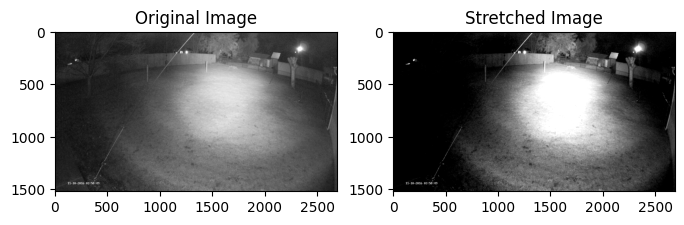

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def StretchContrast(image, min_intensity, max_intensity, out_min, out_max):
    # Clip the pixel values to the specified intensity range
    stretched_image = np.clip(image, min_intensity, max_intensity)

    # Apply the contrast stretching transformation
    stretched_image = (stretched_image - min_intensity) / (max_intensity - min_intensity) * (out_max - out_min) + out_min

    # Ensure the pixel values are within the output intensity range
    stretched_image = np.clip(stretched_image, out_min, out_max)

    return stretched_image

# Example usage with Matplotlib:
image = cv2.imread('/content/CVtest1.png', 0)  # Read the image in grayscale (change if necessary)

# Define the color intensity range for contrast stretching
min_intensity = 50
max_intensity = 200
out_min = 0
out_max = 255

# Apply contrast stretching
stretched_image = StretchContrast(image, min_intensity, max_intensity, out_min, out_max)

# Display the resulting image using Matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(stretched_image, cmap='gray'), plt.title('Stretched Image')
plt.show()


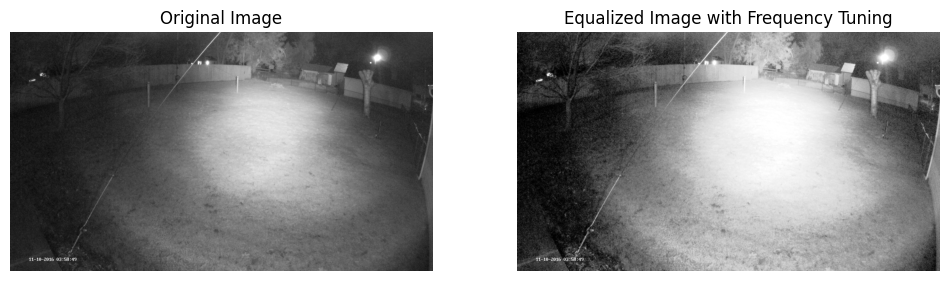

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def EqualizeHistogramWithFrequencyTuning(image, in_min, in_max):
    # Clip the pixel values to the specified intensity range
    equalized_image = np.clip(image, in_min, in_max)

    # Calculate the histogram of the clipped image
    histogram, _ = np.histogram(equalized_image, bins=256, range=(0, 256))

    # Calculate the cumulative histogram
    cumulative_histogram = np.cumsum(histogram)

    # Normalize the cumulative histogram
    cumulative_histogram = (cumulative_histogram - cumulative_histogram.min()) / (cumulative_histogram.max() - cumulative_histogram.min()) * (in_max - in_min) + in_min

    # Map the pixel intensities using the cumulative histogram
    equalized_image = cumulative_histogram[equalized_image]

    return equalized_image

# Example usage with Matplotlib:
# Load an image (you can use any method to load an image)
image = cv2.imread('/content/CVtest1.png', 0)  # Read the image in grayscale (change if necessary)

# Define the color intensity range for histogram equalization
in_min = 0  # Replace with your desired minimum intensity
in_max = 255  # Replace with your desired maximum intensity

# Apply histogram equalization with frequency tuning
equalized_image = EqualizeHistogramWithFrequencyTuning(image, in_min, in_max)

# Display the original and equalized images using Matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized Image with Frequency Tuning
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image with Frequency Tuning')
plt.axis('off')

plt.show()


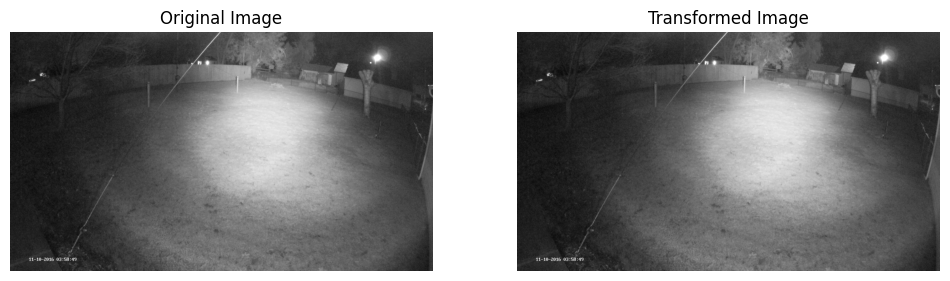

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def GrayScaleTransformation(image, in_min, in_max, out_min, out_max):
    # Clip the pixel values to the specified intensity range
    transformed_image = np.clip(image, in_min, in_max)

    # Apply the gray-scale transformation
    transformed_image = ((transformed_image - in_min) / (in_max - in_min)) * (out_max - out_min) + out_min

    return transformed_image

# Example usage with Matplotlib:
# Load an image (you can use any method to load an image)
image = cv2.imread('/content/CVtest1.png', 0)  # Read the image in grayscale (change if necessary)

# Define the color intensity range for the transformation
in_min = 0  # Replace with your desired minimum input intensity
in_max = 255  # Replace with your desired maximum input intensity
out_min = 0  # Replace with your desired minimum output intensity
out_max = 255  # Replace with your desired maximum output intensity

# Apply the gray-scale transformation
transformed_image = GrayScaleTransformation(image, in_min, in_max, out_min, out_max)

# Display the original and transformed images using Matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()
